#Deep Learning: Image Recognition
###Making predictions with transfer learning
Uses model_structure.json and model_weights.h5 generated from TrainingNeuralNetwork_ExtratectFeatures_deepLearning

In [3]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
from keras.applications import vgg16

In [12]:
# Load the json file that contains the model's structure
try: 
  script_location = Path(__file__).absolute().parent
except:
  model_structure_file = Path("model_structure.json")
else:
  model_structure_file = script_location/ "model_structure.json"
  

model_structure = model_structure_file.read_text()

In [13]:
# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

In [14]:
# Re-load the model's trained weights
model.load_weights("model_weights.h5")

In [20]:
# Load an image file to test, resizing it to 64x64 pixels (as required by this model)
img_name= "dog.png"
try:
  img_file= script_location/img_name 
except:
  img_file = Path(img_name)
img = image.load_img(img_file, target_size=(64, 64))

erro


In [21]:
# Convert the image to a numpy array
image_array = image.img_to_array(img)

In [22]:
# Add a forth dimension to the image (since Keras expects a bunch of images, not a single image)
images = np.expand_dims(image_array, axis=0)

In [23]:
# Normalize the data
images = vgg16.preprocess_input(images)

In [24]:
# Use the pre-trained neural network to extract features from our test image (the same way we did to train the model)
feature_extraction_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
features = feature_extraction_model.predict(images)

58900480/58889256 [==============================] - 0s 0us/step


In [25]:
# Given the extracted features, make a final prediction using our own model
results = model.predict(features)

In [26]:
# Since we are only testing one image with possible class, we only need to check the first result's first element
single_result = results[0][0]

In [27]:
# Print the result
print("Likelihood that this image contains a dog: {}%".format(int(single_result * 100)))

Likelihood that this image contains a dog: 100%


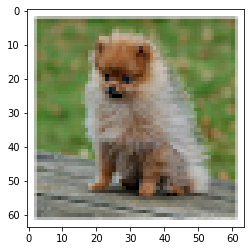

In [28]:
###Print image
import matplotlib.pyplot as plt
sample_image = image.load_img(img_file, target_size=(64, 64))
# Draw the image as a plot
plt.imshow(sample_image)
# Show the plot on the screen
plt.show()